In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Generate 2D heat map

Create a grid of points

In [42]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
X.shape
Y.shape

(100, 100)

(100, 100)

Define the temperature function: hottest at center, cooler further away

Formula: Z = 10 - (X^2 + Y^2)

In [43]:
Z = 10 - (X**2 + Y**2)
Z.shape

(100, 100)

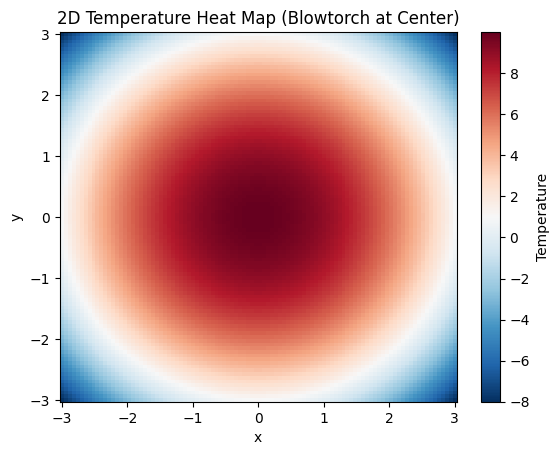

In [44]:
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='auto')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.title('2D Temperature Heat Map (Blowtorch at Center)')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

### 2D Heat Map with Gradient Arrows

Create grid and temperature function

In [45]:
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = 10 - (X**2 + Y**2)
Z.shape

(20, 20)

Calculate Gradient (Partial Derivatives)

In [46]:
dy, dx = np.gradient(Z)
dy.shape
dx.shape

(20, 20)

(20, 20)

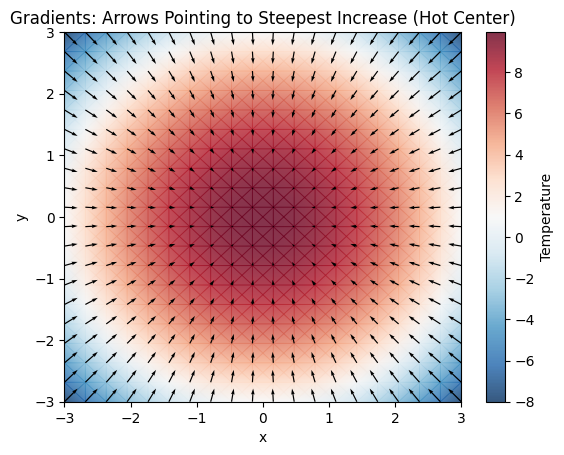

In [47]:
heatmap = plt.pcolormesh(X, Y, Z, cmap='RdBu_r', shading='gouraud', alpha=0.8)
_ = plt.quiver(X, Y, dx, dy, color='black')  # Draw arrows pointing uphill
_ = plt.title('Gradients: Arrows Pointing to Steepest Increase (Hot Center)')
_ = plt.colorbar(heatmap, label='Temperature')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

### 3D "Temperature Hill"

In [49]:
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(x, y)
zz = 10 - (xx**2 + yy**2)

In [53]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz, colorscale='RdBu_r'
)])
fig.update_layout(
    title='3D Temperature Hill (Gradient Visualization)',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='Temperature (Z)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800,
    height=600
)

### 3D Gaussian Hill

In [56]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
xx, yy = np.meshgrid(x, y)

Gaussian Formula: z = A * exp(-(x^2 + y^2) / (2 * sigma^2))

This creates a "bump" that flattens out at the edges

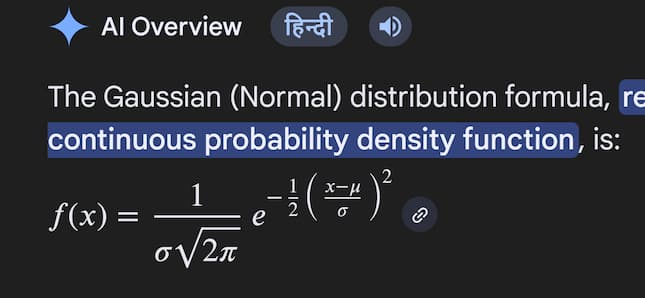

In [57]:
A = 10        # Peak height
sigma = 2.5   # Width of the hill
zz = A * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

In [61]:
fig = go.Figure(data=[go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu_r',
    showscale=False
)])

fig.update_layout(
    title='Gaussian Temperature Hill (Flattens at Edges)',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='Temperature (Z)',
        zaxis=dict(range=[0, 10]),  # Keep height consistent
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    ),
    width=800, height=600
)